In [1857]:
# Import libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Data Modeling
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
# Model Evaluation and Comparison
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

%matplotlib inline

In [1858]:
# read datasets
df_credits = pd.read_csv("archive/tmdb_5000_credits.csv")
df_movies = pd.read_csv("archive/tmdb_5000_movies.csv")

Load in the datasets and check for first five rows

In [1859]:
df_credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [1860]:
df_movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


### Check the general structure of both the datasets

In [1861]:
# Check the shape of the first dataset
df_credits.shape

(4803, 4)

In [1862]:
# Check the shape of the second dataset
df_movies.shape

(4803, 20)

**df_credits has 4803 rows and 4 columns while df_mov has 4803 rows and 20 columns. Let's explore further**

In [1863]:
# Check for the duplicates in the first dataset
sum(df_credits.duplicated())

0

In [1864]:
# Check for the duplicates in the second dataset
sum(df_movies.duplicated())

0

**Both the datasets do not have any duplicate rows**

checking data type of datasets

In [1865]:
# Check for the datatypes of each variable in the first dataset
df_credits.dtypes

movie_id     int64
title       object
cast        object
crew        object
dtype: object

In [1866]:
# Check for the datatypes of each variable in the second dataset
df_movies.dtypes

budget                    int64
genres                   object
homepage                 object
id                        int64
keywords                 object
original_language        object
original_title           object
overview                 object
popularity              float64
production_companies     object
production_countries     object
release_date             object
revenue                   int64
runtime                 float64
spoken_languages         object
status                   object
tagline                  object
title                    object
vote_average            float64
vote_count                int64
dtype: object

`release_date` variable should be of the form datetime 

In [1867]:
# Check for unique values in each variable in the first dataset
df_credits.nunique()

movie_id    4803
title       4800
cast        4761
crew        4776
dtype: int64

**While there are 4803 movies in total, there are only 4800 unique titles which suggest the presence of duplicates**


In [1868]:
# Check for unique values in each variable in the second dataset
df_movies.nunique()

budget                   436
genres                  1175
homepage                1691
id                      4803
keywords                4222
original_language         37
original_title          4801
overview                4800
popularity              4802
production_companies    3697
production_countries     469
release_date            3280
revenue                 3297
runtime                  156
spoken_languages         544
status                     3
tagline                 3944
title                   4800
vote_average              71
vote_count              1609
dtype: int64

1. While there are 4803 movies in total, there are only 4800 unique titles and which suggest the presence of duplicates
2. There are 4800 titles but 4801 original titles which suggests further investigation in the 2 variables
3. There are 4802 unique popularity values instead of 4803 which suggests presence of duplicates
4. Status has only 3 unique values which needs further investigation to find if we need all the observations or some of them can be removed

In [1869]:
# Check for detailed info in the first dataset
df_credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  4803 non-null   int64 
 1   title     4803 non-null   object
 2   cast      4803 non-null   object
 3   crew      4803 non-null   object
dtypes: int64(1), object(3)
memory usage: 150.2+ KB


In [1870]:
# Check for detailed info in the second dataset
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

**Presence of null values can be seen in some variables namely - `homepage`, `overview`, `release_date`, `runtime`, and `tagline`**

In [1871]:
df_movies.status.value_counts()

status
Released           4795
Rumored               5
Post Production       3
Name: count, dtype: int64

**It can be seen that there are almost all the obseravtions which belong to `Released` status. Therefore, we need to limit the dataset to this value of status only as including other status types also makes no sense**


In [1872]:
df_movies.isnull().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

**There are huge number of null counts in `homepage` followed by `tagline`. These are the variables which we might not even require in our further analysis**

##### As we saw above `original_title` and `title` unique values did not match, so we need to explore them further


In [1873]:
# Check the instances where original title do not match with title column
df_movies[['original_title', 'title']].query('original_title != title')

,original_title,title
97,シン・ゴジラ,Shin Godzilla
215,4: Rise of the Silver Surfer,Fantastic 4: Rise of the Silver Surfer
235,Astérix aux Jeux Olympiques,Asterix at the Olympic Games
317,金陵十三釵,The Flowers of War
474,Évolution,Evolution
...,...,...
4699,Lumea e a mea,The World Is Mine
4719,Une femme mariée: Suite de fragments d'un film...,The Married Woman
4751,"Gabriela, Cravo e Canela",Gabriela
4790,دایره,The Circle


### Merging df_movies and df_credits (adding 'movie_id' and 'cast' columns to df_movies).

In [1874]:
df = pd.concat([df_movies, df_credits[['movie_id', 'cast']]], axis=1)
df.shape

(4803, 22)

In [1875]:
# Creating the 'profitable' column
df['profitable'] = df.revenue > df.budget
df['profitable'] = df['profitable'].astype(int)

# Defining the Outcomes
regression_target = 'revenue'
classification_target = 'profitable'

df["profitable"].value_counts()

profitable
1    2585
0    2218
Name: count, dtype: int64

In [1876]:
df.isnull().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
movie_id                   0
cast                       0
profitable                 0
dtype: int64

**So, we saw that there are 261 instances where `original_title` doesn't match with `title`. So, it's possible that number of unique values differ in both the columns. Therefore, we are on the same place as before that we need to explore `title` column further which we will do in the _Further Exploration and Cleaning_ section**

### Further Exploration and Cleaning 

#### Issues to be resolved:
1. Filter df_movies to the observations with Released status in the new dataset cl_mov which is always a good decision because we might need the original dataset at any time in the analysis

2. Drop the unnecessary columns

3. Drop the null observations in any variable

4. Explore and check title variable further for duplicates in df_movies

5. change the data type of the `release_date` to datetime in df_movies

6. Try to resolve the variables that find difficult to explore

**1. Filter df_mov to the observations with _Released_ status in the new dataset cl_mov which is always a good decision because we might need the original dataset at any time in the analysis**

In [1877]:
# Filter df_movies with status 'Released'
cl_mov = df_movies[df_movies['status'] == "Released"]
cl_mov.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


In [1878]:
# confirm only status is "Released"
cl_mov.status.unique()

/home/mahdi/Documents/daneshkar2/lib/python3.10/site-packages/IPython/core/displayhook.py:281: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


array(['Released'], dtype=object)

**2. Drop the unnecessary columns**

In [1879]:
# Drop columns not required further for analysis
cl_mov.drop(['homepage', 'keywords', 'original_language', 'original_title', 'tagline', 'overview', 'spoken_languages', 'status'], axis=1, inplace = True)
cl_mov.head(2)

/tmp/ipykernel_3584/1795847102.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cl_mov.drop(['homepage', 'keywords', 'original_language', 'original_title', 'tagline', 'overview', 'spoken_languages', 'status'], axis=1, inplace = True)


,budget,genres,id,popularity,production_companies,production_countries,release_date,revenue,runtime,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,Pirates of the Caribbean: At World's End,6.9,4500


In [1880]:
# Check the shape again of cl_mov
cl_mov.shape

(4795, 12)

In [1881]:
# Check the null counts again of cl_mov
cl_mov.isnull().sum()

budget                  0
genres                  0
id                      0
popularity              0
production_companies    0
production_countries    0
release_date            1
revenue                 0
runtime                 2
title                   0
vote_average            0
vote_count              0
dtype: int64

**3. Now, cl_mov looks much better and the null counts are so less that we can directly drop the null observations in any variable**

In [1882]:
cl_mov.dropna(inplace = True)

/tmp/ipykernel_3584/4272081948.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cl_mov.dropna(inplace = True)


In [1883]:
# Check the shape again of cl_mov
cl_mov.shape

(4792, 12)

**4. As we saw in the previous section, the `title` may have duplicates. So, check if there are any duplicates with respect to `title` variable**

In [1884]:
# Check for duplicates in the title variable in cl_mov
cl_mov[cl_mov['title'].duplicated() == True]

,budget,genres,id,popularity,production_companies,production_countries,release_date,revenue,runtime,title,vote_average,vote_count
2877,11000000,"[{""id"": 27, ""name"": ""Horror""}, {""id"": 18, ""nam...",1255,27.655270,"[{""name"": ""Cineclick Asia"", ""id"": 685}, {""name...","[{""iso_3166_1"": ""KR"", ""name"": ""South Korea""}]",2006-07-27,88489643,119.0,The Host,6.7,537
3693,0,"[{""id"": 18, ""name"": ""Drama""}]",10844,0.706355,[],"[{""iso_3166_1"": ""NZ"", ""name"": ""New Zealand""}]",2006-10-12,0,103.0,Out of the Blue,5.9,18
4267,1377800,"[{""id"": 10751, ""name"": ""Family""}, {""id"": 12, ""...",2661,9.815394,"[{""name"": ""Twentieth Century Fox Film Corporat...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1966-07-30,0,105.0,Batman,6.1,203


**5. Check for individual duplicate titles**

In [1885]:
cl_mov[cl_mov['title'].str.contains('Out of the Blue')]

,budget,genres,id,popularity,production_companies,production_countries,release_date,revenue,runtime,title,vote_average,vote_count
3647,0,"[{""id"": 18, ""name"": ""Drama""}]",39269,0.679351,"[{""name"": ""Robson Street"", ""id"": 71953}]","[{""iso_3166_1"": ""CA"", ""name"": ""Canada""}]",1980-05-01,0,94.0,Out of the Blue,6.5,17
3693,0,"[{""id"": 18, ""name"": ""Drama""}]",10844,0.706355,[],"[{""iso_3166_1"": ""NZ"", ""name"": ""New Zealand""}]",2006-10-12,0,103.0,Out of the Blue,5.9,18


In [1886]:
cl_mov[cl_mov['title'].str.contains('The Host')]

,budget,genres,id,popularity,production_companies,production_countries,release_date,revenue,runtime,title,vote_average,vote_count
972,44000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",72710,42.933027,"[{""name"": ""Nick Wechsler Productions"", ""id"": 8...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2013-03-22,63327201,125.0,The Host,6.0,1817
2877,11000000,"[{""id"": 27, ""name"": ""Horror""}, {""id"": 18, ""nam...",1255,27.655270,"[{""name"": ""Cineclick Asia"", ""id"": 685}, {""name...","[{""iso_3166_1"": ""KR"", ""name"": ""South Korea""}]",2006-07-27,88489643,119.0,The Host,6.7,537


In [1887]:
cl_mov[cl_mov['title'].str.contains('Batman')]

,budget,genres,id,popularity,production_companies,production_countries,release_date,revenue,runtime,title,vote_average,vote_count
9,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",209112,155.790452,"[{""name"": ""DC Comics"", ""id"": 429}, {""name"": ""A...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2016-03-23,873260194,151.0,Batman v Superman: Dawn of Justice,5.7,7004
119,150000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",272,115.040024,"[{""name"": ""DC Comics"", ""id"": 429}, {""name"": ""L...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2005-06-10,374218673,140.0,Batman Begins,7.5,7359
210,125000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",415,50.073575,"[{""name"": ""PolyGram Filmed Entertainment"", ""id...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",1997-06-20,238207122,125.0,Batman & Robin,4.2,1418
299,100000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",414,48.205606,"[{""name"": ""Warner Bros."", ""id"": 6194}, {""name""...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",1995-05-31,336529144,121.0,Batman Forever,5.2,1498
428,80000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 14, ""nam...",364,59.113174,"[{""name"": ""PolyGram Filmed Entertainment"", ""id...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",1992-06-19,280000000,126.0,Batman Returns,6.6,1673
1359,35000000,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 28, ""na...",268,44.104469,"[{""name"": ""PolyGram Filmed Entertainment"", ""id...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",1989-06-23,411348924,126.0,Batman,7.0,2096
3854,3500000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 16, ""nam...",142061,25.891466,"[{""name"": ""DC Comics"", ""id"": 429}, {""name"": ""W...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2013-01-18,0,78.0,"Batman: The Dark Knight Returns, Part 2",7.9,419
4267,1377800,"[{""id"": 10751, ""name"": ""Family""}, {""id"": 12, ""...",2661,9.815394,"[{""name"": ""Twentieth Century Fox Film Corporat...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1966-07-30,0,105.0,Batman,6.1,203


**So, we observed that our intuition was wrong and there can be two or more movies with the same name**

**6. Change the data type of the `release_date` to datetime**

In [1888]:
cl_mov['release_date'] = pd.to_datetime(cl_mov['release_date'])
cl_mov.dtypes

/tmp/ipykernel_3584/730170391.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cl_mov['release_date'] = pd.to_datetime(cl_mov['release_date'])


budget                           int64
genres                          object
id                               int64
popularity                     float64
production_companies            object
production_countries            object
release_date            datetime64[ns]
revenue                          int64
runtime                        float64
title                           object
vote_average                   float64
vote_count                       int64
dtype: object

### Cleaning df dataset

In [1889]:
df.isnull().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
movie_id                   0
cast                       0
profitable                 0
dtype: int64

In [1890]:
# Dropping the unimportant columns to reduce the amount of np.nan values in the dataset
df.drop(['homepage', 'production_companies', 'production_countries', 'spoken_languages', 'original_title'], axis=1, inplace=True)

In [1891]:
# Checking the number of values for which "Revenue" column contains "0"
df[df['revenue'] == 0].shape

(1427, 18)

In [1892]:
# Replacing the data points with "Budget" as "0" to "np.nan" and then checking the amount of null values present
df['budget'] = pd.to_numeric(df['budget'], errors='coerce')
df['budget'] = df['budget'].replace(0, np.nan)
df[df['budget'].isnull()].shape

(1037, 18)

In [1893]:
# Creating a column which shows the return gained or lost from the movie production and checking the amount of null values  
df['return'] = df['revenue'] / df['budget']
df[df['return'].isnull()].shape

(1037, 19)

In [1894]:
# Replacing any infinite values with np.nan and then dropping all rows of data containing missing values
df = df.replace([np.inf, -np.inf], np.nan)
df.dropna(how="any", inplace=True)

In [1895]:
# Checking the final dimensions of the dataset
df.shape

(3368, 19)

In [1896]:
df.isnull().sum()

budget               0
genres               0
id                   0
keywords             0
original_language    0
overview             0
popularity           0
release_date         0
revenue              0
runtime              0
status               0
tagline              0
title                0
vote_average         0
vote_count           0
movie_id             0
cast                 0
profitable           0
return               0
dtype: int64

### Feature Engineering

#### Encoding of Genres Column

Many of the variables in our dataframe contain the names of genre, actors/actresses, and keywords. Here, we add indicator columns for each genre.

#### Steps

- We determine all the genres in the genre column and make use of the `strip()` function on each genre to remove trailing characters.
- Next, we include each listed genre as a new column in the dataframe. Each element of these genre columns is 1 if the movie belongs to that particular genre, and 0 otherwise, keeping in mind, a movie may belong to several genres at once.
- This process is also called as `One-Hot Encoding` but here it is applied on each data of each row of the Column. 

In [1897]:
# Determining and Storing the Genres
list_genres = df.genres.apply(lambda x: x.split(","))

genres = []

for row in list_genres:
    row = [genre.strip() for genre in row]
    for genre in row:
        if genre not in genres:
            genres.append(genre)

genres = [item for item in genres if 'id' not in item]
for i in range(len(genres)):
    genres[i] = genres[i].replace('name', '').replace('"','').replace(':','').replace('}', '').replace(']', '').replace('[', '').strip()
genres = [item for item in genres if len(item)!=0]

# Encoding the Genres
for genre in genres:
    df[genre] = df['genres'].str.contains(genre).astype(int)


df[genres]

,Action,Adventure,Fantasy,Science Fiction,Action,Crime,Crime,Drama,Thriller,Adventure,...,Western,Horror,Music,Music,Documentary,Documentary,Foreign,TV Movie,TV Movie,Foreign
0,1,1,1,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,1,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4791,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4792,0,0,0,0,0,1,1,0,1,0,...,0,1,0,0,0,0,0,0,0,0
4796,0,0,0,1,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4798,1,0,0,0,1,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


#### Creating the `Year` column for analysis

Some variables in the dataset can be used to create new and important columns which can be further used for better analysis of the dataset

#### Steps
- Create a new column, `year` where we extract and store the year of production of a movie from the given format of `release_date`

In [1898]:
df['release_date'].head()

0    2009-12-10
1    2007-05-19
2    2015-10-26
3    2012-07-16
4    2012-03-07
Name: release_date, dtype: object

In [1899]:
df['year'] = pd.to_datetime(df['release_date'], errors='coerce').apply(lambda x: str(x).split('-')[0])  # if x != np.nan else np.nan)

In [1900]:
df['year'].isnull().sum()

0

### Feature Selection

Some variables in the dataset are already numeric and perhaps useful for regression and classification. Here, we will store the names of these variables for future use. We will also take a look at some of the continuous variables and outcomes by plotting each pair in a scatter plot. Finally, we will evaluate the skew of each variable.

#### Steps 
* We call `plt.show()` to observe the plot shown below to find which of the covariates and/or outcomes are correlated with each other.
* We call `skew()` on the columns `outcomes_and_continuous_covariates` in the dataset and check the features for which the skew is above 1.

budget          2.125931
popularity      9.340052
runtime         1.718038
vote_count      3.297113
vote_average   -0.827932
revenue         3.894194
profitable     -0.790847
dtype: float64


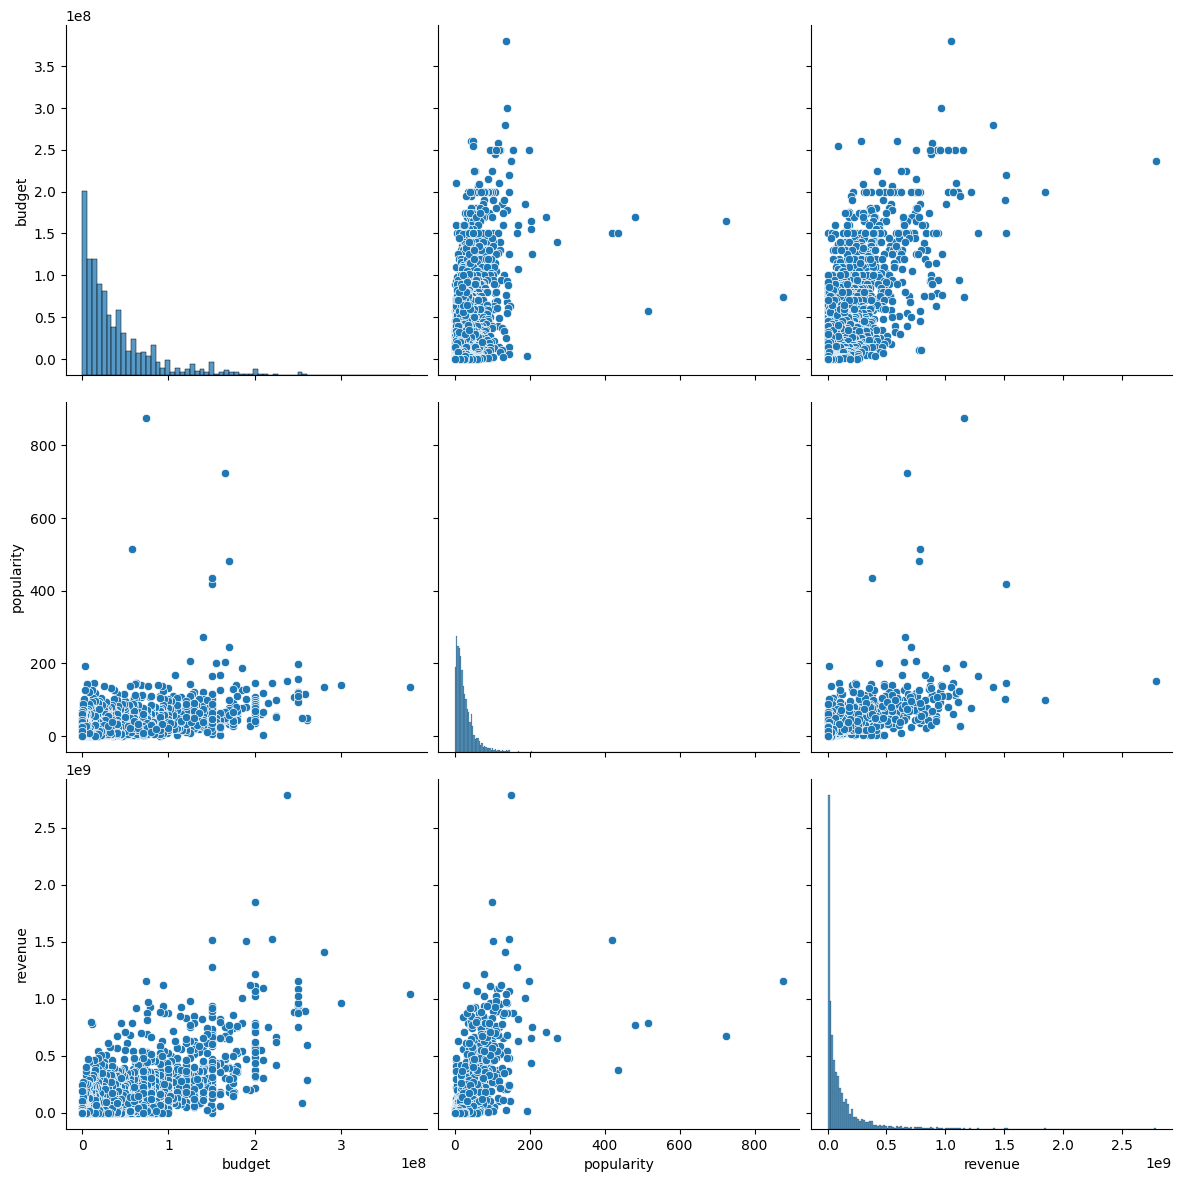

In [1901]:
continuous_covariates = ['budget', 'popularity', 'runtime', 'vote_count', 'vote_average']
outcomes_and_continuous_covariates = continuous_covariates + [regression_target, classification_target]
plotting_variables = ['budget', 'popularity', regression_target]

sns.pairplot(data=df[plotting_variables], height=4)

# determining the skew.
print(df[outcomes_and_continuous_covariates].skew())

* It appears that the variables `budget`, `popularity`, `runtime`, `vote_count`, and `revenue` are all right-skewed.
* Only `vote_average` and `profitable` are the data with negative value and all the others contain positive or right skewdness.

### Feature Transformation

Here, we will transform these variables to eliminate this skewness. Specifically, we will use the `np.log10()` method. Because some of these variable values are exactly 0, we will add a small positive value to each to ensure it is defined; this is necessary because log(0) is negative infinity.

#### Steps
- For each above-mentioned variable in the dataset `df`, we will transform the value `x` into `np.log10(1+x)`.

In [1902]:
# Eliminating skewness for each Variable
for covariate in ['budget', 'popularity', 'runtime', 'vote_count', 'revenue']:
    df[covariate] = df[covariate].apply(lambda x: np.log10(1+x))

budget         -3.326771
popularity     -0.364911
runtime        -3.983314
vote_count     -0.501869
vote_average   -0.827932
revenue        -2.063336
profitable     -0.790847
dtype: float64


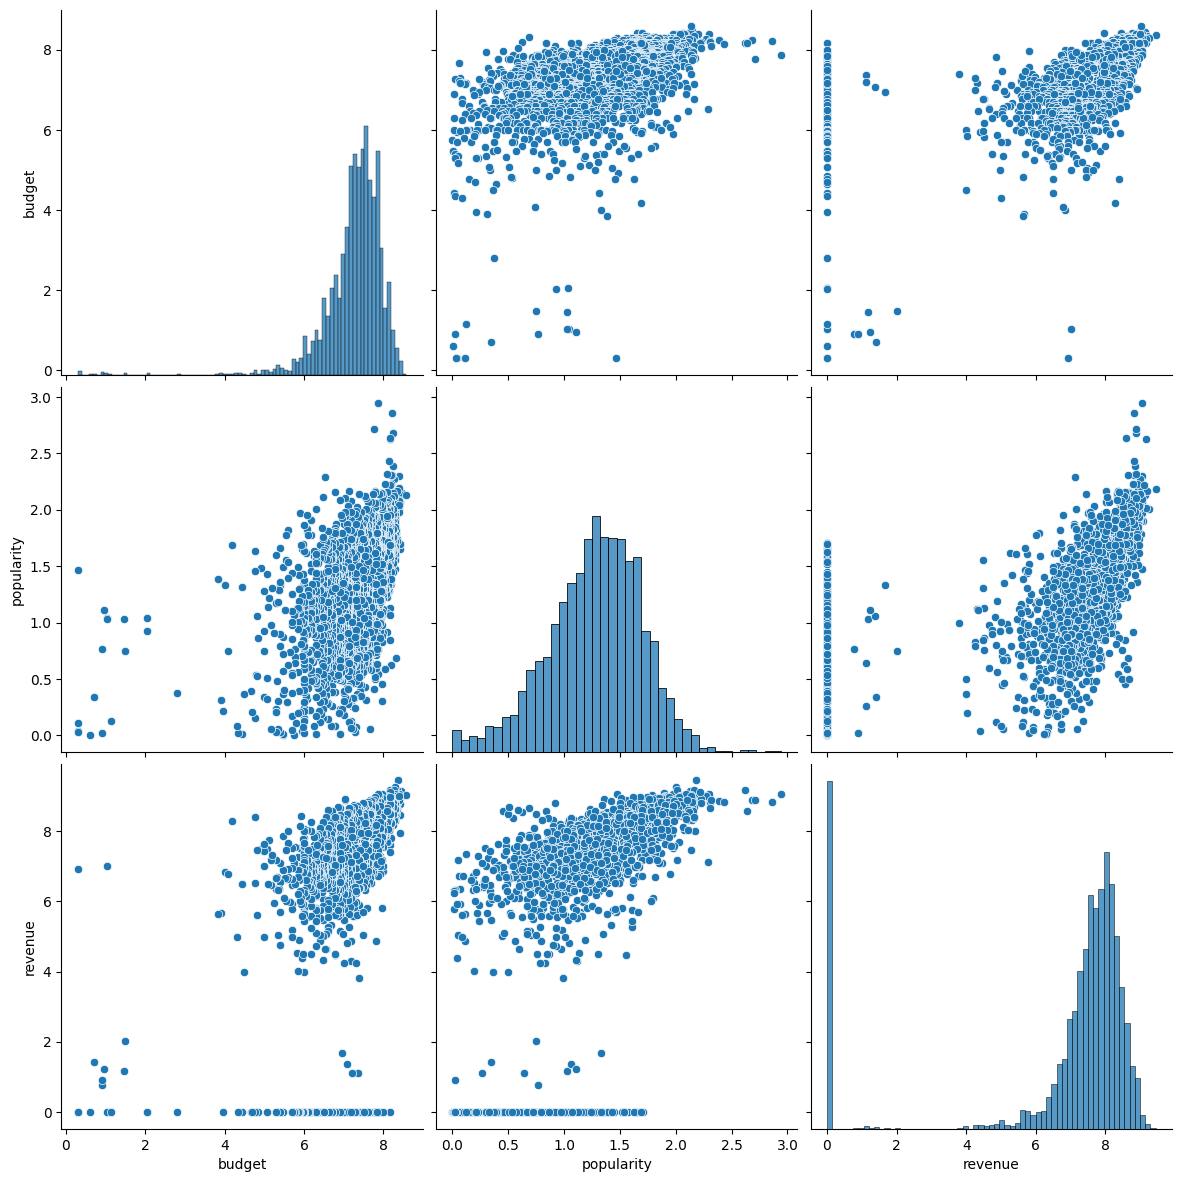

In [1903]:
sns.pairplot(data=df[plotting_variables], height=4)

print(df[outcomes_and_continuous_covariates].skew())

* We see now that the skewness has been eliminated
* All the variables are having negative value.

<a id='eda'></a>
## Exploratory Data Analysis

So, now, as the title suggests, we are ready for **Exploratory Data Analysis**. As we know, we need to form questions for further research and analysis, this part will help us form those questions after we explore deeper and try to look at some specific areas for research. We will do this part stepwise as we have been doing till now. 


In [1904]:
cl_mov.head(2)

,budget,genres,id,popularity,production_companies,production_countries,release_date,revenue,runtime,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,Pirates of the Caribbean: At World's End,6.9,4500


 Look at the descriptive statistics of cl_mov

In [1905]:
# Look at the descriptive statistics of the data
cl_mov.describe()

,budget,id,popularity,release_date,revenue,runtime,vote_average,vote_count
count,4.792000e+03,4792.000000,4792.000000,4792,4.792000e+03,4792.000000,4792.000000,4792.000000
mean,2.910776e+07,56834.982679,21.540728,2002-12-21 15:10:13.021702656,8.244929e+07,106.937396,6.095597,691.791110
min,0.000000e+00,5.000000,0.000372,1916-09-04 00:00:00,0.000000e+00,0.000000,0.000000,0.000000
25%,8.052110e+05,9008.750000,4.738475,1999-07-01 12:00:00,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14580.000000,12.969129,2005-09-26 12:00:00,1.928273e+07,104.000000,6.200000,236.500000
75%,4.000000e+07,58428.750000,28.364400,2011-02-11 18:00:00,9.325544e+07,118.000000,6.800000,738.500000
max,3.800000e+08,447027.000000,875.581305,2017-02-03 00:00:00,2.787965e+09,338.000000,10.000000,13752.000000
std,4.074753e+07,88190.236903,31.837061,NaN,1.629963e+08,22.519776,1.184029,1235.565038


In [1906]:
mean_rev = cl_mov['revenue'].mean()
mean_rev

82449291.67591819

In [1907]:
mean_bud = cl_mov['budget'].mean()
mean_bud

29107756.786101837

Although the values look good, but let'check if there are any zero values in `revenue` and other variable that is relatable i.e. `budget`

In [1908]:
cl_mov.query('revenue == 0 or budget == 0')

,budget,genres,id,popularity,production_companies,production_countries,release_date,revenue,runtime,title,vote_average,vote_count
83,27000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",79698,2.418535,"[{""name"": ""Corsan"", ""id"": 7299}, {""name"": ""Bli...","[{""iso_3166_1"": ""AU"", ""name"": ""Australia""}, {""...",2015-02-13,0,109.0,The Lovers,4.8,34
135,150000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 27, ""name...",7978,21.214571,"[{""name"": ""Universal Pictures"", ""id"": 33}, {""n...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2010-02-11,0,102.0,The Wolfman,5.5,549
265,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 14, ""nam...",10588,18.251129,"[{""name"": ""Imagine Entertainment"", ""id"": 23}, ...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2003-11-21,0,82.0,The Cat in the Hat,4.9,366
309,84000000,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 35, ""na...",10214,17.815595,"[{""name"": ""New Line Cinema"", ""id"": 12}, {""name...","[{""iso_3166_1"": ""DE"", ""name"": ""Germany""}, {""is...",2005-02-18,0,94.0,Son of the Mask,3.6,338
321,0,"[{""id"": 35, ""name"": ""Comedy""}]",77953,16.460356,"[{""name"": ""Everyman Pictures"", ""id"": 2242}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-08-09,104907746,85.0,The Campaign,5.6,578
...,...,...,...,...,...,...,...,...,...,...,...,...
4797,0,"[{""id"": 10769, ""name"": ""Foreign""}, {""id"": 53, ...",67238,0.022173,[],[],2005-03-12,0,80.0,Cavite,7.5,2
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",72766,0.642552,[],[],2011-12-26,0,85.0,Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",231617,1.444476,"[{""name"": ""Front Street Pictures"", ""id"": 3958}...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2013-10-13,0,120.0,"Signed, Sealed, Delivered",7.0,6
4801,0,[],126186,0.857008,[],"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-05-03,0,98.0,Shanghai Calling,5.7,7


In [1909]:
cl_mov.query('revenue == 0 or budget == 0').count()

budget                  1564
genres                  1564
id                      1564
popularity              1564
production_companies    1564
production_countries    1564
release_date            1564
revenue                 1564
runtime                 1564
title                   1564
vote_average            1564
vote_count              1564
dtype: int64

replace the zero values in both the columns with their respective means

In [1910]:
cl_mov.replace({'revenue': {0: mean_rev}}, inplace = True)
cl_mov.query('revenue == 0 or budget == 0').count()

/tmp/ipykernel_3584/3652147361.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cl_mov.replace({'revenue': {0: mean_rev}}, inplace = True)


budget                  1031
genres                  1031
id                      1031
popularity              1031
production_companies    1031
production_countries    1031
release_date            1031
revenue                 1031
runtime                 1031
title                   1031
vote_average            1031
vote_count              1031
dtype: int64

In [1911]:
cl_mov.replace({'budget': {0: mean_bud}}, inplace = True)
cl_mov.query('revenue == 0 or budget == 0').count()

/tmp/ipykernel_3584/1808098965.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cl_mov.replace({'budget': {0: mean_bud}}, inplace = True)


budget                  0
genres                  0
id                      0
popularity              0
production_companies    0
production_countries    0
release_date            0
revenue                 0
runtime                 0
title                   0
vote_average            0
vote_count              0
dtype: int64

let's check for another variable i.e. `runtime`

In [1912]:
cl_mov.query('runtime == 0').count()

budget                  33
genres                  33
id                      33
popularity              33
production_companies    33
production_countries    33
release_date            33
revenue                 33
runtime                 33
title                   33
vote_average            33
vote_count              33
dtype: int64

Looks like, here also we need to replace the zero values with the mean

In [1913]:
mean_rt = cl_mov['runtime'].mean()
mean_rt

106.93739565943238

In [1914]:
cl_mov.replace({'runtime': {0: mean_rt}}, inplace = True)
cl_mov.query('runtime == 0').count()

/tmp/ipykernel_3584/1884486745.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cl_mov.replace({'runtime': {0: mean_rt}}, inplace = True)


budget                  0
genres                  0
id                      0
popularity              0
production_companies    0
production_countries    0
release_date            0
revenue                 0
runtime                 0
title                   0
vote_average            0
vote_count              0
dtype: int64

explore `release_date` further in terms of year, month and weekday

In [1915]:
# Add a year column using release_date
cl_mov['year'] = cl_mov['release_date'].dt.year
cl_mov.head(2)

/tmp/ipykernel_3584/686450696.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cl_mov['year'] = cl_mov['release_date'].dt.year


,budget,genres,id,popularity,production_companies,production_countries,release_date,revenue,runtime,title,vote_average,vote_count,year
0,237000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2.787965e+09,162.0,Avatar,7.2,11800,2009
1,300000000.0,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,9.610000e+08,169.0,Pirates of the Caribbean: At World's End,6.9,4500,2007


In [1916]:
# Add a month column using release_date
cl_mov['month'] = cl_mov['release_date'].dt.month
cl_mov.head(2)

/tmp/ipykernel_3584/370304929.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cl_mov['month'] = cl_mov['release_date'].dt.month


,budget,genres,id,popularity,production_companies,production_countries,release_date,revenue,runtime,title,vote_average,vote_count,year,month
0,237000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2.787965e+09,162.0,Avatar,7.2,11800,2009,12
1,300000000.0,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,9.610000e+08,169.0,Pirates of the Caribbean: At World's End,6.9,4500,2007,5


In [1917]:
# Add a weekday column using release_date
cl_mov['day'] = cl_mov['release_date'].dt.day_name()
cl_mov.head(2)

/tmp/ipykernel_3584/2613134180.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cl_mov['day'] = cl_mov['release_date'].dt.day_name()


,budget,genres,id,popularity,production_companies,production_countries,release_date,revenue,runtime,title,vote_average,vote_count,year,month,day
0,237000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2.787965e+09,162.0,Avatar,7.2,11800,2009,12,Thursday
1,300000000.0,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,9.610000e+08,169.0,Pirates of the Caribbean: At World's End,6.9,4500,2007,5,Saturday


we can get the profit values bu using `revenue` and `budget` values as

<b>$revenue - budget = profit$</b>

In [1918]:
cl_mov['profit'] = cl_mov['revenue'] - cl_mov['budget']
cl_mov.profit.head(2)

/tmp/ipykernel_3584/2267733616.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cl_mov['profit'] = cl_mov['revenue'] - cl_mov['budget']


0    2.550965e+09
1    6.610000e+08
Name: profit, dtype: float64

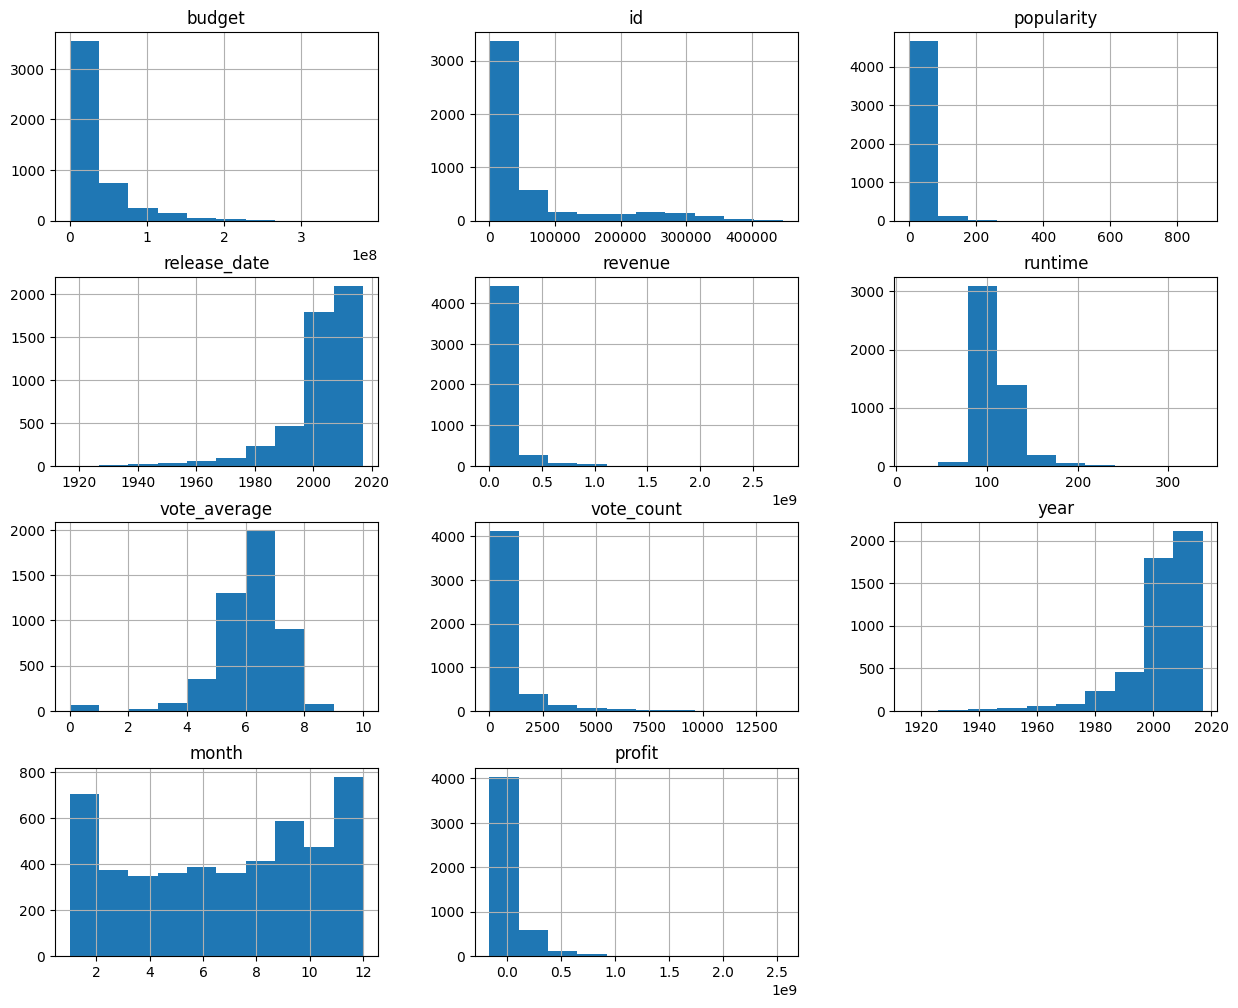

In [1919]:
cl_mov.hist(figsize = (15,12));

1. Most movies lie in the budget range 0 to 0.5 on a e to the power 8 scale
2. Most movies were made in the months of January and December
3. Most movies have popularity between 0 to 100 
4. Many movies have negative profit values which suggests loss making movies
5. Most movies have revenue collection in the range 0 to 0.25 but on a e to the power of 9 scale
6. Most movies have runtime in the range of 75 to 150 
7. Vote average has a bit scattered distribution than other variables with most movies lying in the range of 6-7 voting average
8. Most movies have been released between the years 2000 and 2015

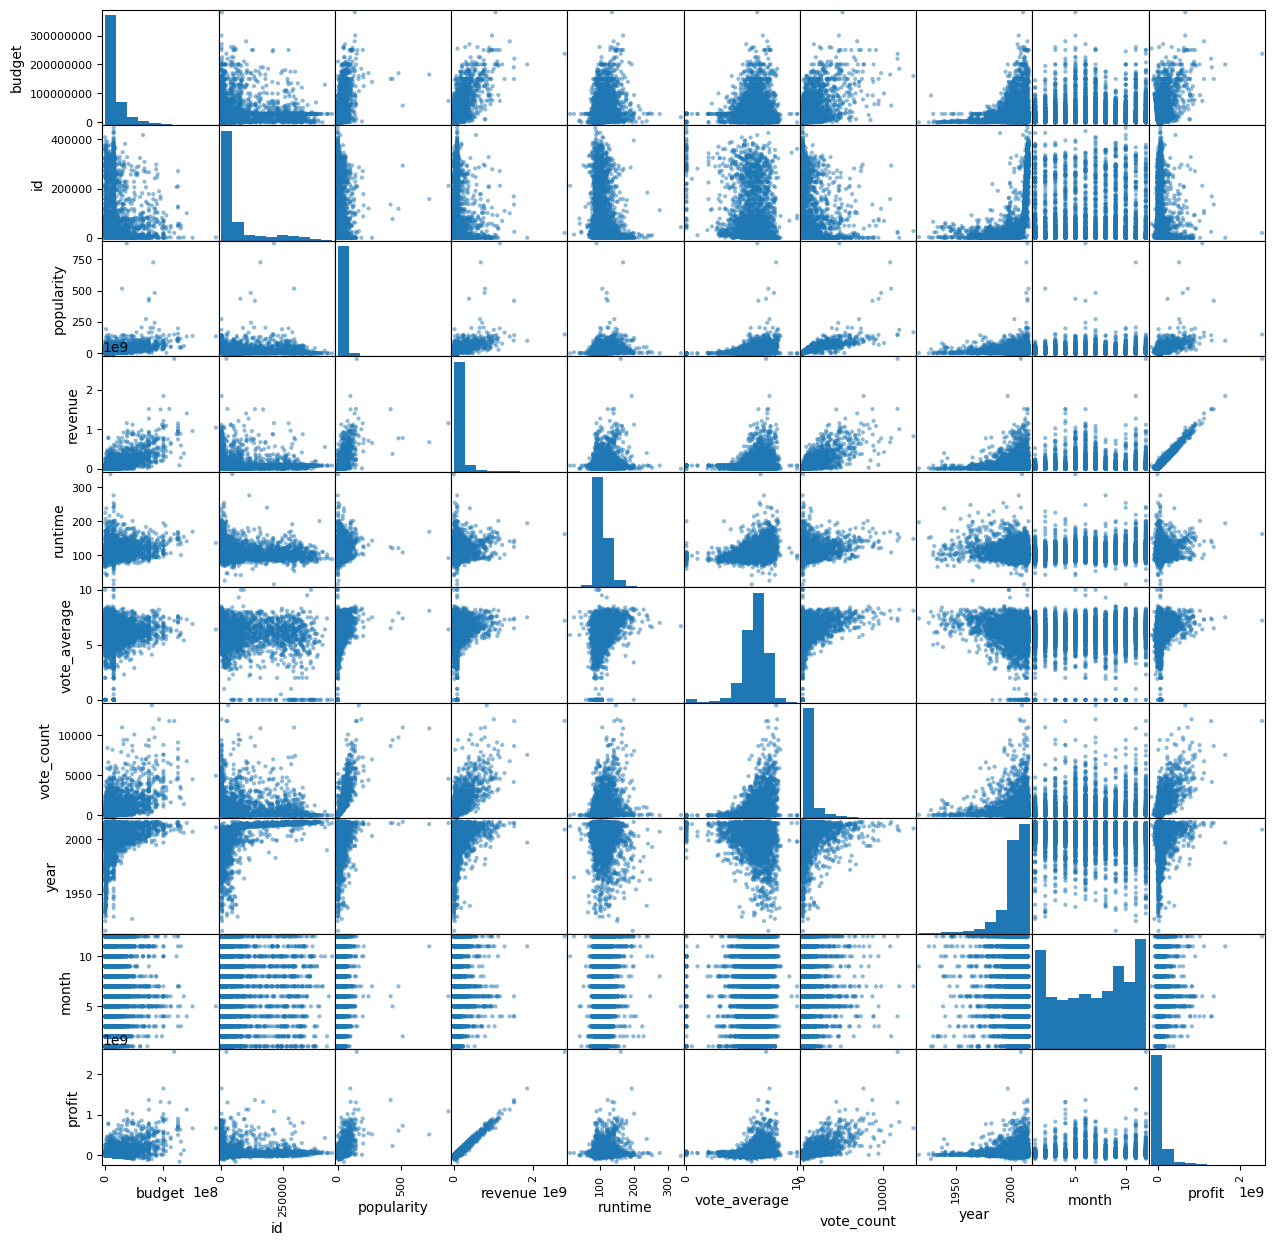

In [1920]:
pd.plotting.scatter_matrix(cl_mov, figsize = (15,15));

Among these scatterplots we will observe our relations of interest:
1. Profit vs Popularity shows positive but low correlation.
2. Profit vs Revenue shows the highest positive correlation
3. Profit vs Runtime show positive but very low correlation
4. Vote Average vs Runtime also show positive but low correlation
5. Popularity vs runtime also has very low but positive correlation

### Which weekdays as release days turn out to be most lucky for movies in terms of popularity and profit?

In [1921]:
# Seperate the necessay variables and groupby weekdays 
df1 = cl_mov.groupby('day')[['profit', 'popularity']]
df1.head(2)

,profit,popularity
0,2.550965e+09,150.437577
1,6.610000e+08,139.082615
2,6.356746e+08,107.376788
3,8.349391e+08,112.312950
4,2.413910e+07,43.926995
5,6.328716e+08,115.699814
6,3.317949e+08,48.681969
8,6.839592e+08,98.885637
11,3.860907e+08,107.928811
17,6.657138e+08,135.413856


In [1922]:
# Take the mean of dependent variables
df1 = df1.mean()
df1

,profit,popularity
day,,
Friday,4.992227e+07,16.303436
Monday,8.237837e+07,21.081432
Saturday,7.156912e+07,16.916489
Sunday,5.899899e+07,14.356027
Thursday,7.575379e+07,24.703346
Tuesday,1.033782e+08,26.415341
Wednesday,1.080997e+08,32.694124


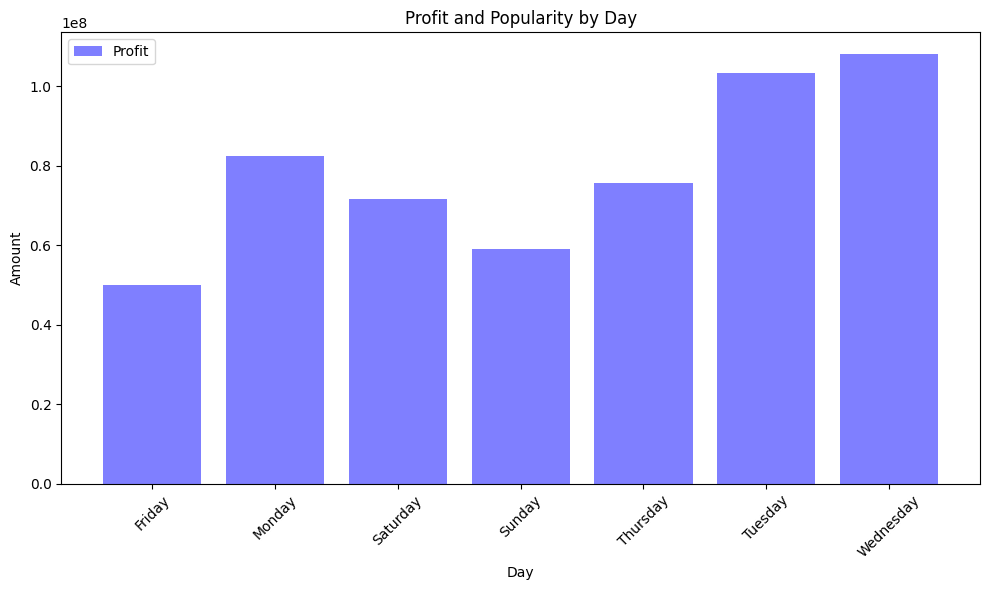

In [1923]:
plt.figure(figsize=(10, 6))

plt.bar(df1.index, df1['profit'], color='b', alpha=0.5, label='Profit')
# plt.bar(df1['popularity']*1e7, color='g', alpha=0.5, width=bar_width, label='Popularity/1e7')

plt.xlabel('Day')
plt.ylabel('Amount')
plt.title('Profit and Popularity by Day')
plt.legend()
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

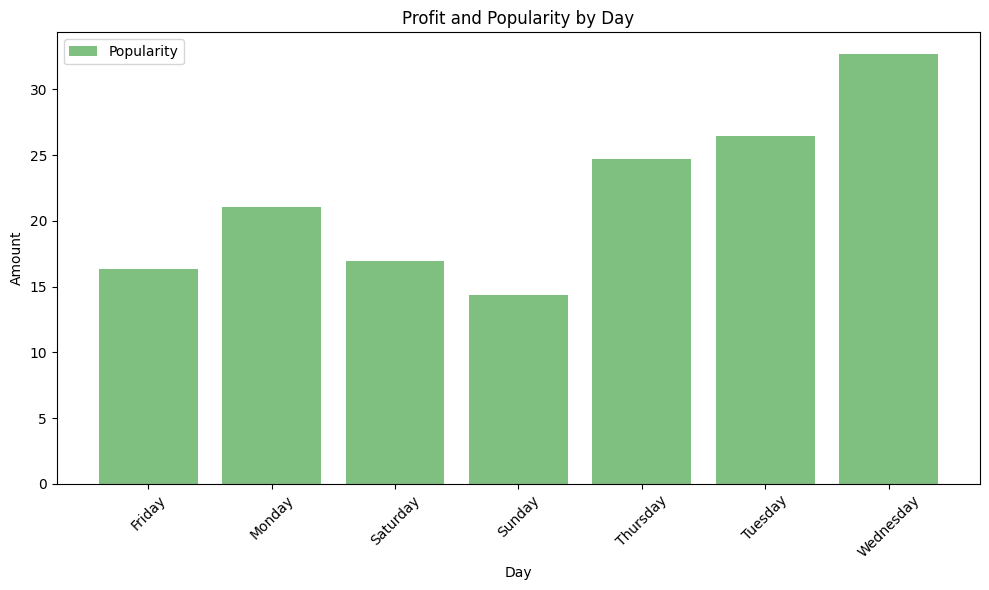

In [1924]:
plt.figure(figsize=(10, 6))

plt.bar(df1.index ,df1['popularity'], color='g', alpha=0.5, label='Popularity')

plt.xlabel('Day')
plt.ylabel('Amount')
plt.title('Profit and Popularity by Day')
plt.legend()
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

1. Wednesday has the highest average profit i.e 108 Million Dollars for the movies released on that day.
2. Friday has the lowest average profit i.e. 49.9 Million Dollars for the movies released on that day.
3. Wednesday has the highest average popularity too i.e 32.69 units
4. Sunday has the lowest average popularity i.e. 14.35 units

### How the time duration has been affecting High Profits, High Voting Average and High Popularity over the years from 2000 to 2017 ?

<Axes: ylabel='count'>

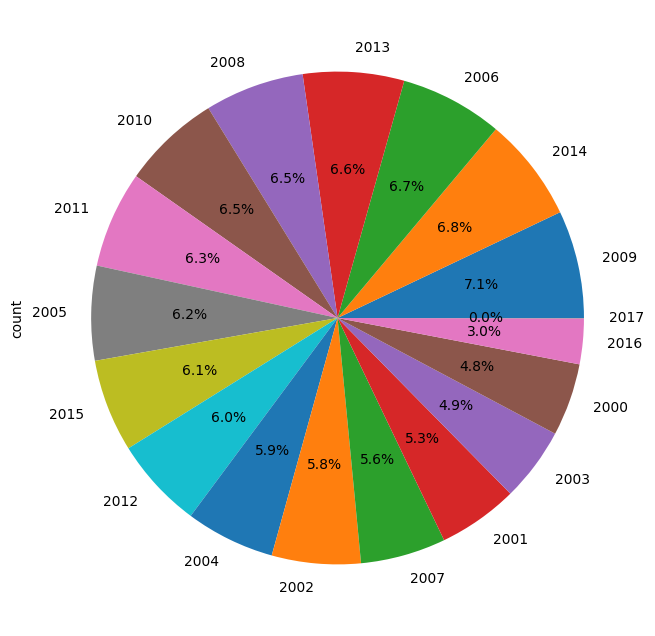

In [1925]:
cl_mov.query('year >= 2000')['year'].value_counts().plot(kind='pie', figsize=(8, 8), autopct='%1.1f%%')

In [1926]:
df_v1 = cl_mov.query('year >= 2000')

0.22330638659448815


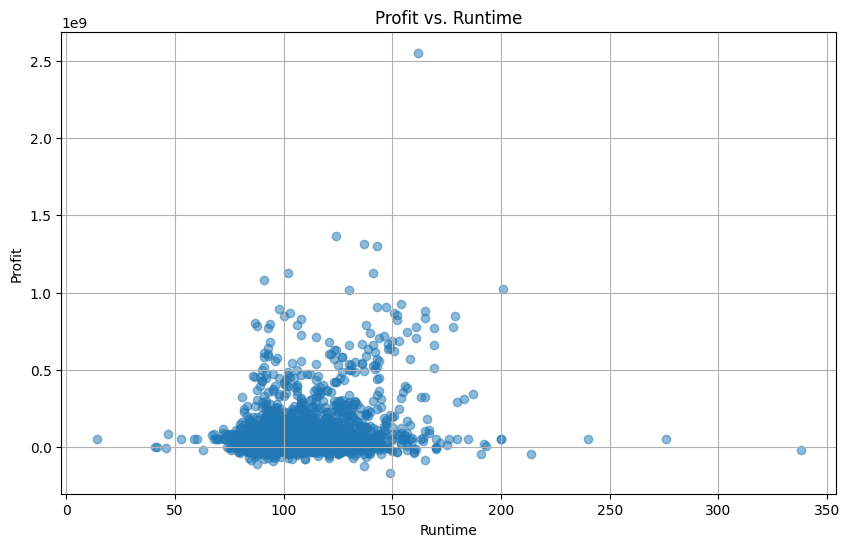

In [1927]:
correlation_coefficient = df_v1['runtime'].corr(df_v1['profit'])
print(correlation_coefficient)

# Assuming df_v1 is your DataFrame
plt.figure(figsize=(10, 6))
plt.scatter(df_v1['runtime'], df_v1['profit'], alpha=0.5)
plt.title('Profit vs. Runtime')
plt.xlabel('Runtime')
plt.ylabel('Profit')
plt.grid(True)
plt.show()


**From the above calculations and the overall trend, we decided the ranges**

**a. 0-80 for short movies**

**b. 80-140 for medium movies**

**c. Greater than 140 for long movies**

**5. Divide the dataset in 3 different subsets according to the above defined ranges for runtime**

0.09259705263777722


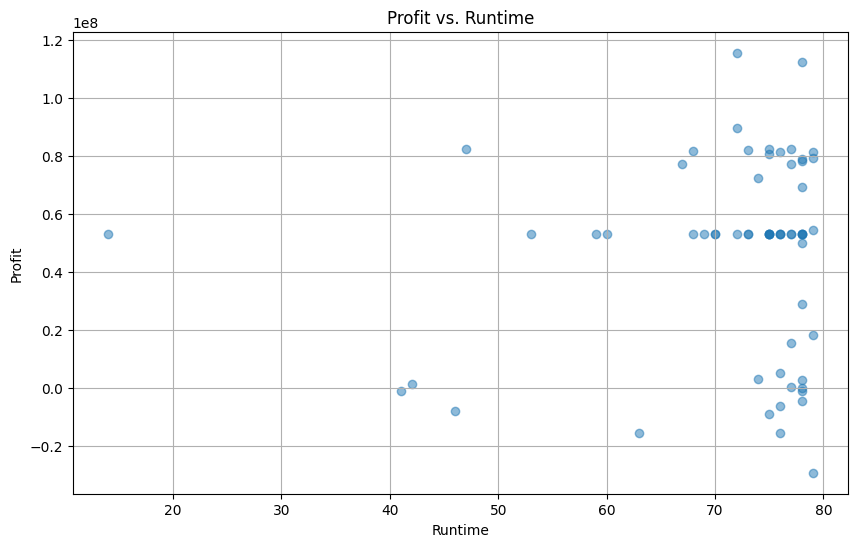

In [1928]:
# Form a dataset for short movies
df_v2 = df_v1.query('runtime < 80')

correlation_coefficient = df_v2['runtime'].corr(df_v1['profit'])
print(correlation_coefficient)

# Assuming df_v1 is your DataFrame
plt.figure(figsize=(10, 6))
plt.scatter(df_v2['runtime'], df_v2['profit'], alpha=0.5)
plt.title('Profit vs. Runtime')
plt.xlabel('Runtime')
plt.ylabel('Profit')
plt.grid(True)
plt.show()


0.10620046947868586


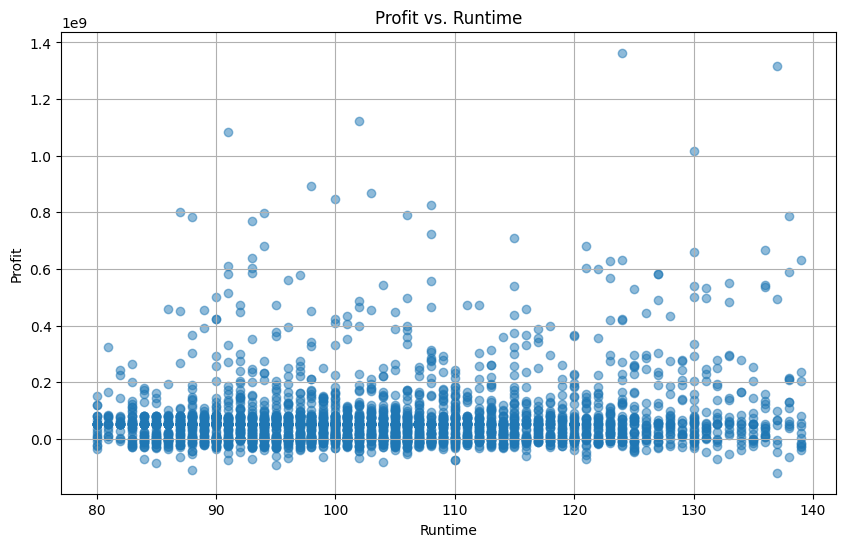

In [1929]:
# Form a dataset for medium movies
df_v3 = df_v1.query('(runtime >= 80) & (runtime <140)')

correlation_coefficient = df_v3['runtime'].corr(df_v1['profit'])
print(correlation_coefficient)

# Assuming df_v1 is your DataFrame
plt.figure(figsize=(10, 6))
plt.scatter(df_v3['runtime'], df_v3['profit'], alpha=0.5)
plt.title('Profit vs. Runtime')
plt.xlabel('Runtime')
plt.ylabel('Profit')
plt.grid(True)
plt.show()


-0.04670203199437174


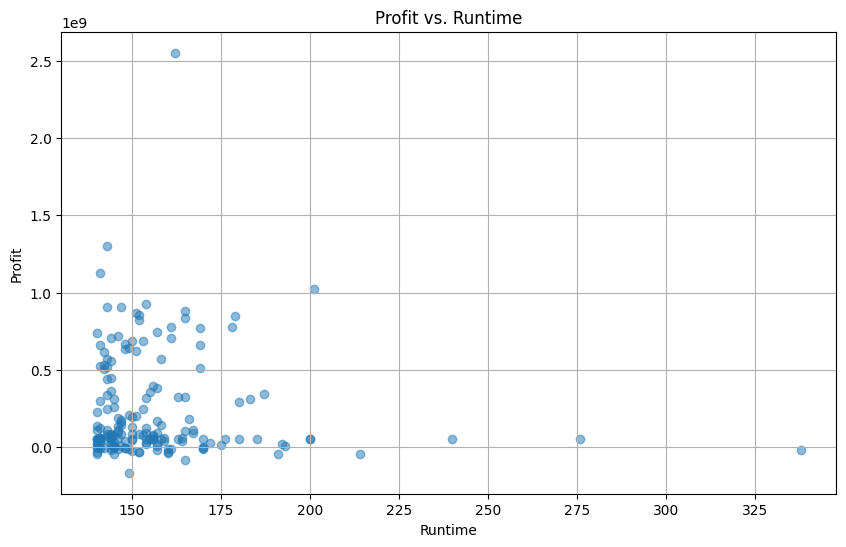

In [1930]:
# Form a dataset for long movies
df_v4 = df_v1.query('runtime >= 140')

correlation_coefficient = df_v4['runtime'].corr(df_v1['profit'])
print(correlation_coefficient)

# Assuming df_v1 is your DataFrame
plt.figure(figsize=(10, 6))
plt.scatter(df_v4['runtime'], df_v4['profit'], alpha=0.5)
plt.title('Profit vs. Runtime')
plt.xlabel('Runtime')
plt.ylabel('Profit')
plt.grid(True)
plt.show()


there is no correlation between runtime and profit


In [1931]:
# Analysing all the features from a statistical point of view
df.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count,movie_id,profitable,return,...,Comedy,Romance,Horror,Mystery,History,War,Music,Documentary,Foreign,TV Movie
count,3368.000000,3368.000000,3368.000000,3368.000000,3368.000000,3368.000000,3368.000000,3368.000000,3368.000000,3.368000e+03,...,3368.000000,3368.000000,3368.000000,3368.000000,3368.000000,3368.000000,3368.000000,3368.000000,3368.000000,3368.000000
mean,7.263210,46965.046021,1.274750,6.783098,2.036829,6.244656,2.575544,46965.046021,0.683789,2.831078e+03,...,0.351247,0.177257,0.115202,0.084026,0.040083,0.032957,0.034739,0.009798,0.001188,0.000594
std,0.769042,78537.894629,0.418130,2.559109,0.081990,0.921825,0.653388,78537.894629,0.465066,1.474697e+05,...,0.477431,0.381942,0.319313,0.277468,0.196183,0.178551,0.183144,0.098514,0.034447,0.024365
min,0.301030,5.000000,0.000688,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,6015.750000,1.015712,7.001404,1.986772,5.700000,2.166576,6015.750000,0.000000,6.763748e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.397940,11544.500000,1.306757,7.670278,2.029384,6.300000,2.630936,11544.500000,1.000000,2.045470e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.724276,46278.750000,1.569835,8.132228,2.082785,6.900000,3.029079,46278.750000,1.000000,4.098453e+00,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.579784,417859.000000,2.942792,9.445287,2.530200,10.000000,4.138397,417859.000000,1.000000,8.500000e+06,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Correlation Analysis

[Text(0, 0.5, 'budget'),
 Text(0, 1.5, 'popularity'),
 Text(0, 2.5, 'revenue'),
 Text(0, 3.5, 'runtime'),
 Text(0, 4.5, 'vote_average'),
 Text(0, 5.5, 'vote_count'),
 Text(0, 6.5, 'profitable'),
 Text(0, 7.5, 'return')]

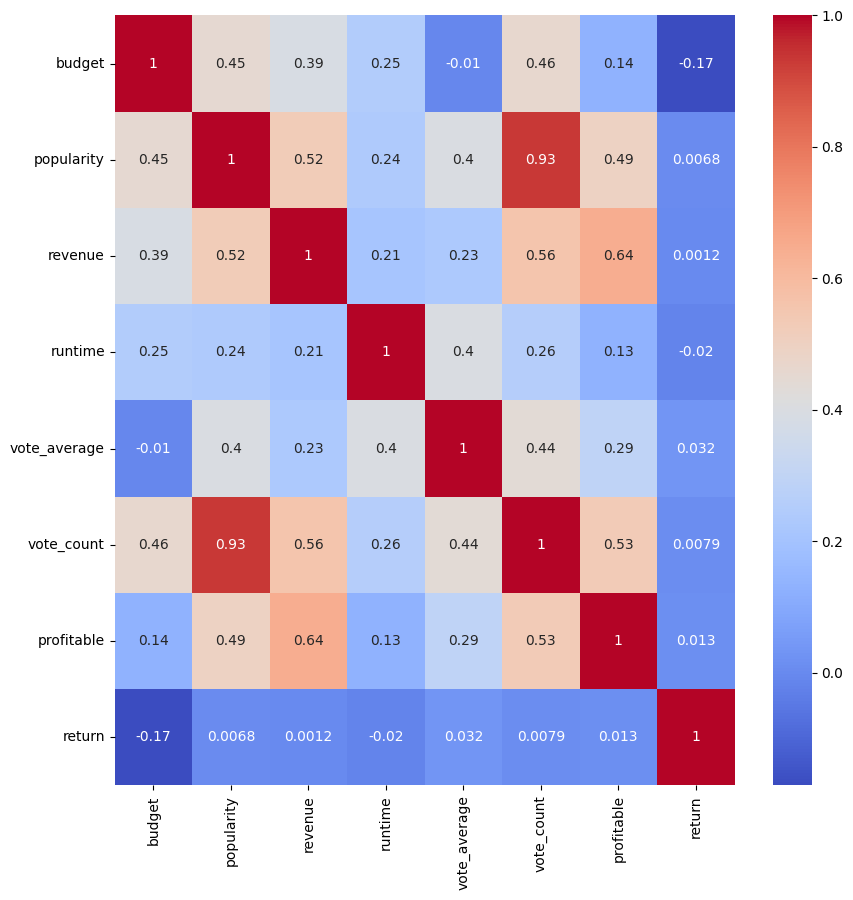

In [1932]:
# Plotting the correlation heatmap of all the features of our dataset
plt.figure(figsize=(10, 10))
numeric_columns = df.iloc[:,:19].select_dtypes(include=['number']).columns
numeric_columns = numeric_columns.drop(['id', 'movie_id'])
heatmap = sns.heatmap(df[numeric_columns].corr(), annot=True, cmap="coolwarm")
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=360)
# sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")


#### Observations:

* Most of the features have Pearson's Correlation Coefficient between 0.3 and 0.7 meaning that they have some relation between them.
* `return` feature is solely created for visualization and so is irrelevant to all the features.

### Regression Target Analysis

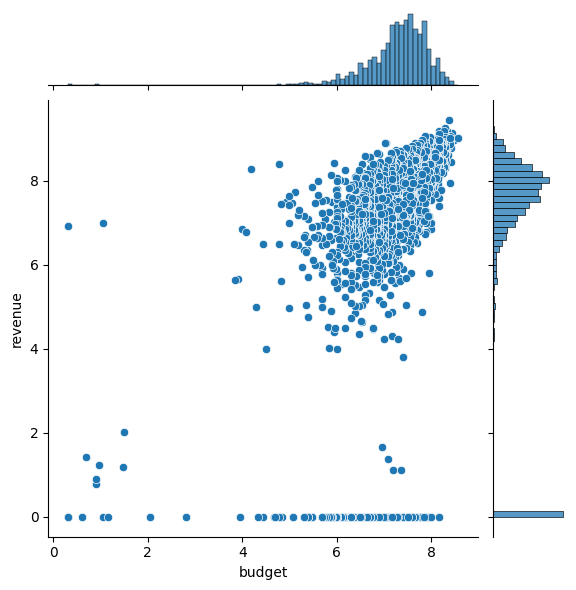

In [1933]:
# plotting the correlation graph between revenue and budget
sns.jointplot(x='budget', y='revenue', data=df)

#### Observations:
* We can definitely see strong corelation between budget and revenue
* Quite a few number of outliers are present
* The relation is mostly linear

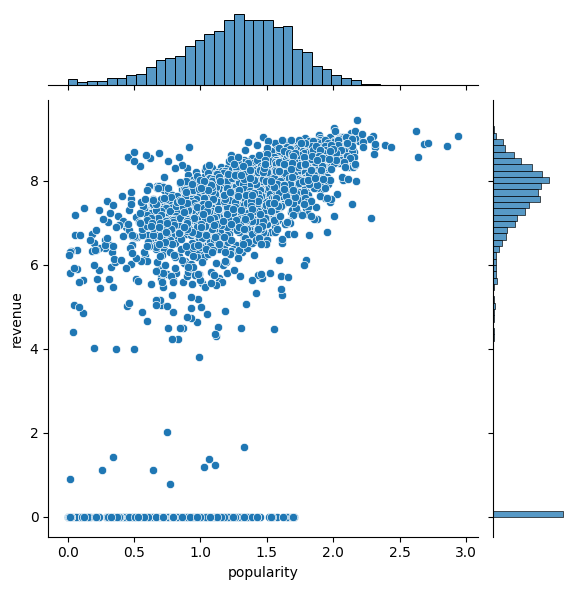

In [1934]:
# plotting the correlation graph between revenue and popularity
sns.jointplot(x='popularity', y='revenue', data=df)

#### Observations:
* Again as expected, we see some corelation between revenue and popularity
* Here, too, quite a few number of outliers are present
* The relation is mostly linear

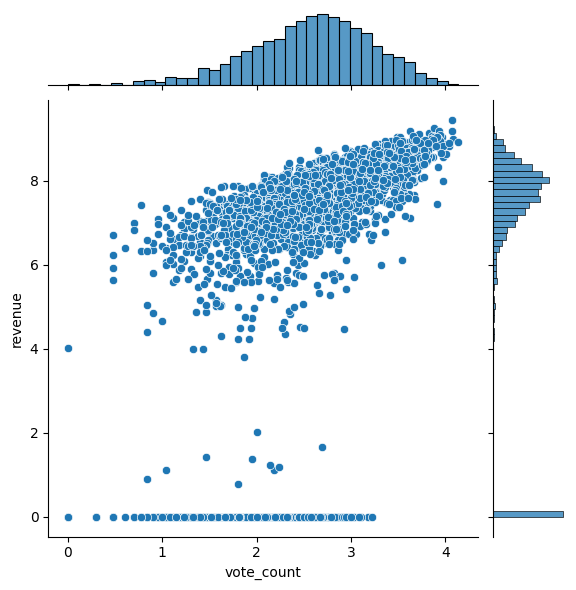

In [1935]:
# plotting the correlation graph between revenue and vote_count
sns.jointplot(x='vote_count', y='revenue', data=df)

#### Observations:
* Strong corelation between revenue and vote_count is observed. 
* The movies that have good returns are necessary to have a good critical score.
* There are outliers present, although not too many.
* The relation is strongly linear.

 **This proves that Predicting `revenue` would require Regression model and thus we will be using - "Linear Regression" and "Random Forest Regression"**

### Movie return Trend analysis over the years

In [1936]:
# Sorting out the title, vote_count and year to check the movies with highest vote_counts ever
df[['title', 'vote_count', 'year']].sort_values('vote_count', ascending=False).head(10)

,title,vote_count,year
96,Inception,4.138397,2010
65,The Dark Knight,4.079290,2008
0,Avatar,4.071919,2009
16,The Avengers,4.071035,2012
788,Deadpool,4.041235,2016
95,Interstellar,4.036150,2014
287,Django Unchained,4.004321,2012
94,Guardians of the Galaxy,3.988693,2014
426,The Hunger Games,3.975707,2012
127,Mad Max: Fury Road,3.974420,2015


In [1937]:
# Storing the same part of the Dataframe with revenue and return in a variable
most_popular_movies_and_return = df[['title', 'vote_count', 'year','revenue','return']].sort_values('vote_count', ascending=False)
most_popular_movies_and_return

,title,vote_count,year,revenue,return
96,Inception,4.138397,2010,8.916734,5.159580
65,The Dark Knight,4.079290,2008,9.001975,5.430046
0,Avatar,4.071919,2009,9.445287,11.763566
16,The Avengers,4.071035,2012,9.181717,6.907081
788,Deadpool,4.041235,2016,8.893824,13.501948
...,...,...,...,...,...
4626,Anderson's Cross,0.000000,2010,0.000000,0.000000
4638,Amidst the Devil's Wings,0.000000,2014,0.000000,0.000000
4486,Naturally Native,0.000000,1999,4.021561,0.015011
3967,Four Single Fathers,0.000000,2009,0.000000,0.000000


In [1938]:
# Storing only the movies with a very high revenue, specifically revenue > 1,00,00,00,000 or 1 billion
most_popular_movies_and_return = most_popular_movies_and_return[most_popular_movies_and_return['revenue']>=9]
most_popular_movies_and_return.head(10)

,title,vote_count,year,revenue,return
65,The Dark Knight,4.079290,2008,9.001975,5.430046
0,Avatar,4.071919,2009,9.445287,11.763566
16,The Avengers,4.071035,2012,9.181717,6.907081
3,The Dark Knight Rises,3.959375,2012,9.035405,4.339756
31,Iron Man 3,3.944828,2013,9.084734,6.077200
28,Jurassic World,3.937668,2015,9.179991,10.090192
98,The Hobbit: An Unexpected Journey,3.918973,2012,9.009070,4.084414
329,The Lord of the Rings: The Return of the King,3.906604,2003,9.048787,11.903074
29,Skyfall,3.881099,2012,9.044760,5.542805
25,Titanic,3.878694,1997,9.266004,9.225171


<Axes: xlabel='year', ylabel='revenue'>

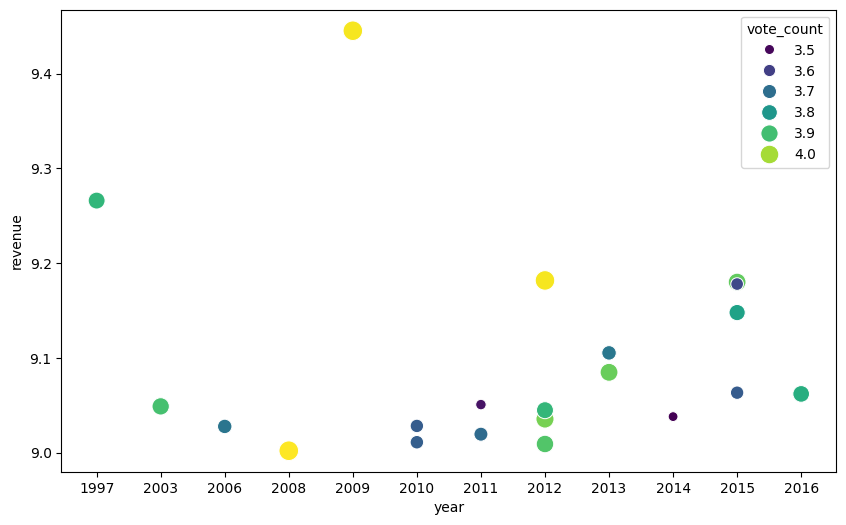

In [1939]:
# Plotting High-revenue and high-vote_count movies according to their release year
plt.figure(figsize=(10, 6))
sns.scatterplot(data=most_popular_movies_and_return.sort_values('year'), x='year', y='revenue', hue='vote_count', palette='viridis', size='vote_count', sizes=(50, 200))


#### Observations:

* After Titanic (1997) which was the first movie to reach 1 billion dollar mark, 2010, 2011, 2012, 2013 and 2015 had many movies crossing the billion dollar mark signimficantly.
* There has been an increase in the revenue of movies filmed till 2012 which showed the peak revenue generated, and although it decreased sharply for 2013 and 2014 yet, it again increased in 2015

### Trend Analysis of `vote_average` of movies

In [1940]:
np.log10(3000)

3.4771212547196626

In [1941]:
# Extracting and printing the sorted sub-dataset of title, vote_average, vote_count and year of the movies for which vote_count is greater than 3000
df[df['vote_count'] > 3.477][['title', 'vote_average', 'vote_count' ,'year']].sort_values('vote_average', ascending=False).head(10)

,title,vote_average,vote_count,year
1881,The Shawshank Redemption,8.5,3.914132,1994
3337,The Godfather,8.4,3.770410,1972
3865,Whiplash,8.3,3.628900,2014
2294,Spirited Away,8.3,3.584444,2001
1818,Schindler's List,8.3,3.636488,1993
3232,Pulp Fiction,8.3,3.925776,1994
662,Fight Club,8.3,3.973774,1999
2731,The Godfather: Part II,8.3,3.523616,1974
809,Forrest Gump,8.2,3.899164,1994
690,The Green Mile,8.2,3.607348,1999


#### Observations:
* These are the 1st 10 movies in rank considering the vote_average feature
* We observe that The Shawshank Redemption (1994) is the movie with the highest vote_average ever

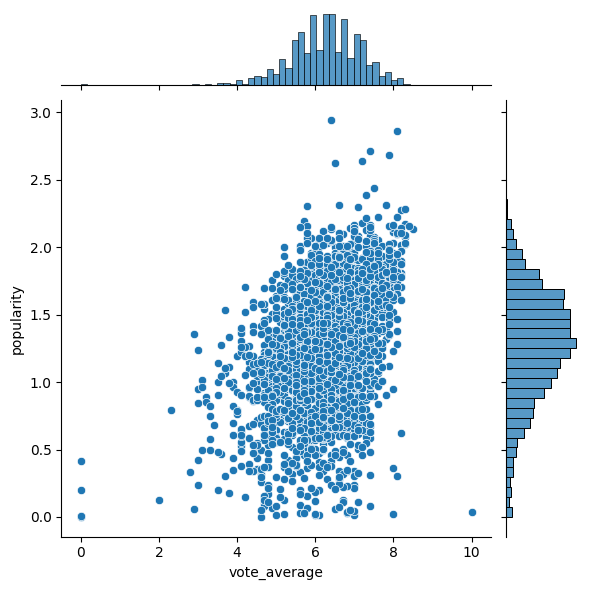

In [1942]:
# plotting the correlation graph between vote_average and popularity
sns.jointplot(x='vote_average', y='popularity', data=df)

#### Observations:
* Some corelation between vote_average and popularity is observed. 
* The movies that have high vote_average doesn't necessarily have to be highly popular.
* There are outliers present, although not too many.
* The relation is mostly linear.

### Genre feature Analysis

In [1943]:
# Extracting the number of of each genre used throughout the total dataset
Movies = []
for genre in genres:
    Movies.append(df[genre].value_counts()[1])
df[genres[0]].value_counts()

Action
0    2420
1     948
Name: count, dtype: int64

In [1944]:
# Creating a new dataframe to store the genres and their count in a sorted order
pop_gen = pd.DataFrame(Movies, genres).reset_index()
pop_gen.columns = ['genre', 'movies']
pop_gen = pop_gen.groupby('genre').sum().reset_index()
pop_gen.sort_values(by='movies', inplace=True, ascending=False, ignore_index=True)
pop_gen

,genre,movies
0,Drama,2982
1,Comedy,2366
2,Thriller,2024
3,Action,1896
4,Adventure,1352
5,Romance,1194
6,Crime,1106
7,Science Fiction,896
8,Horror,776
9,Family,750


Text(0, 0.5, 'Count')

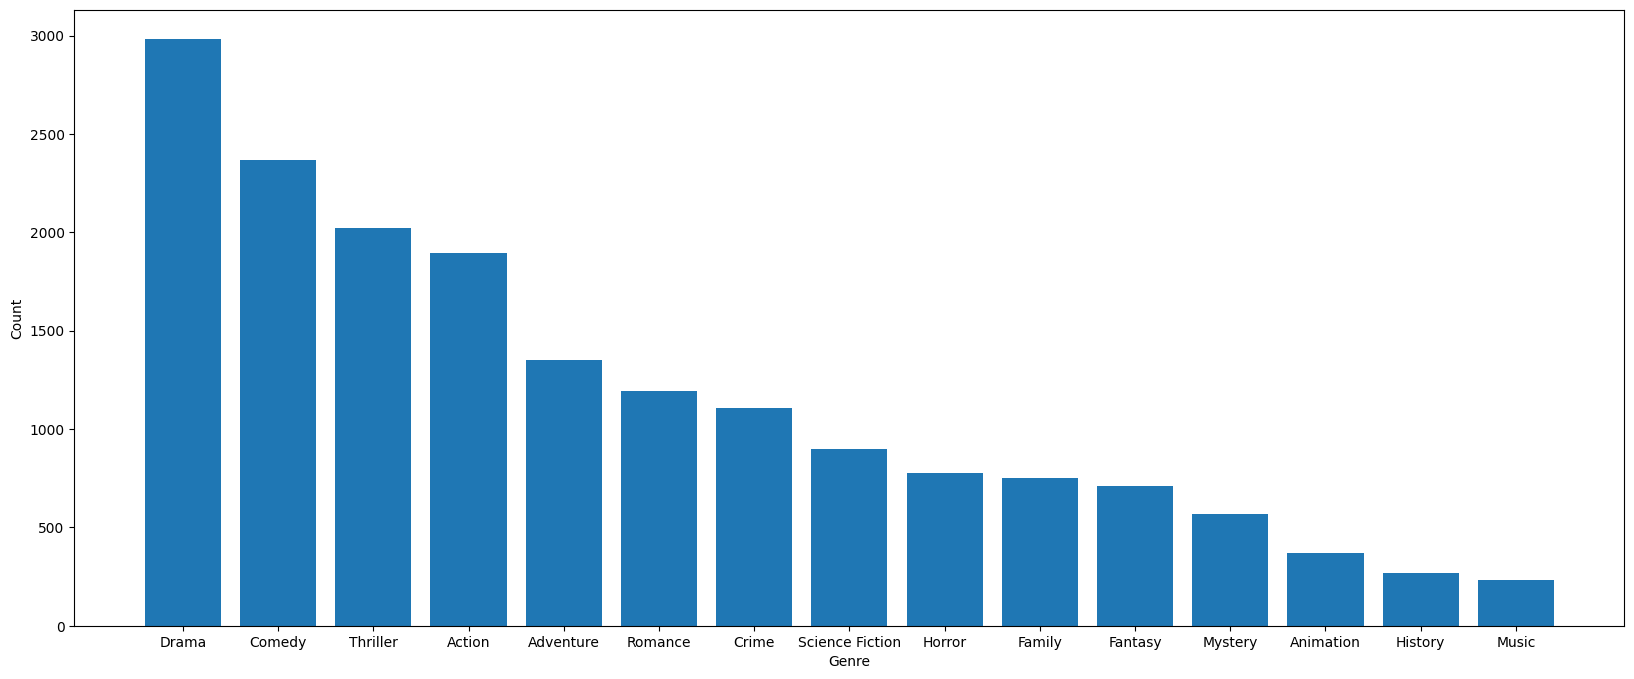

In [1945]:
# Plotting the first 15 genres and their movie count
# plt.figure(figsize=(20,8))
# sns.barplot(x='genre', y='movies', data=pop_gen.head(15))
plt.figure(figsize=(20,8))
bars = plt.bar(pop_gen.head(15)['genre'], pop_gen.head(15)['movies'])
plt.xlabel("Genre")
plt.ylabel("Count")

#### Observations:
* Drama is the most used genre in the Film Industry.
* Comdey and Thriller genres follow after it.
* Foreign and TV Movie genres has the lowest movie count (excluded in the graph).

### General Movie Trend Analysis

In [1946]:
# Checking the most expensive movie ever made
df2 = df[df['budget'].notnull()][['title', 'budget', 'revenue', 'return', 'year']].sort_values('budget', ascending=False)
df2.head(10)

,title,budget,revenue,return,year
17,Pirates of the Caribbean: On Stranger Tides,8.579784,9.019413,2.751878,2011
1,Pirates of the Caribbean: At World's End,8.477121,8.982723,3.203333,2007
7,Avengers: Age of Ultron,8.447158,9.147801,5.019299,2015
4,John Carter,8.414973,8.453531,1.092843,2012
6,Tangled,8.414973,8.772171,2.276134,2010
5,Spider-Man 3,8.411620,8.949815,3.452991,2007
13,The Lone Ranger,8.406540,7.950802,0.350157,2013
46,X-Men: Days of Future Past,8.397940,8.873822,2.991451,2014
22,The Hobbit: The Desolation of Smaug,8.397940,8.981547,3.833600,2013
98,The Hobbit: An Unexpected Journey,8.397940,9.009070,4.084414,2012


In [1947]:
# Printing the Highest Budget that was expended by "Pirates of the Caribbean: On Stranger Tides"
10 ** df2['budget'].max()

380000000.9999994

In [1948]:
# Checking the highest grossing movies of all time
gross_top = df2[['title', 'budget', 'revenue', 'year']].sort_values('revenue', ascending=False).head(10)
gross_top

,title,budget,revenue,year
0,Avatar,8.374748,9.445287,2009
25,Titanic,8.301030,9.266004,1997
16,The Avengers,8.342423,9.181717,2012
28,Jurassic World,8.176091,9.179991,2015
44,Furious 7,8.278754,9.177897,2015
7,Avengers: Age of Ultron,8.447158,9.147801,2015
124,Frozen,8.176091,9.105244,2013
31,Iron Man 3,8.301030,9.084734,2013
546,Minions,7.869232,9.063232,2015
26,Captain America: Civil War,8.397940,9.061944,2016


In [1949]:
10 ** gross_top['revenue'][0]

2787965088.000003

#### Observations: 
* The mighty Avatar was the highest grossing movie of all time, since it generated the highest revenue ever, which was surpassed recently by the Avengers: End Game.

<Axes: xlabel='year'>

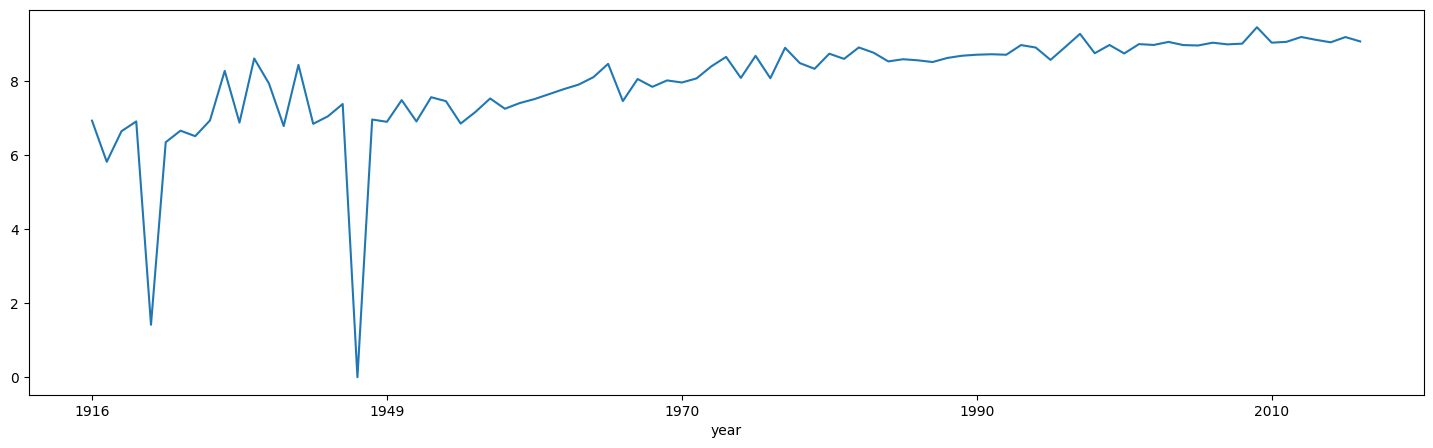

In [1950]:
# Checking the trend of revenue over the years
plt.figure(figsize=(18,5))
year_revenue = df2.groupby('year')['revenue'].max()
year_revenue.plot(kind='line')

#### Observations:
* We can see that the revenue has been steadily increasing over the years 

## Predictive and Comparison Modeling

#### Now we will primarily use the **two models** we previously discussed: **linear/logistic regression** and **random forests** to perform prediction for **regression** and **classification**. We will use the regression models to **predict revenue**, and we will use classification models to **classify whether a movie was profitable**.

In [1951]:
# Define all covariates and outcomes from `df`.
regression_target = 'revenue'
classification_target = 'profitable'
all_covariates = ['budget', 'popularity', 'runtime', 'vote_count', 'vote_average', 'Action', 'Adventure', 'Fantasy', 
                  'Science Fiction', 'Crime', 'Drama', 'Thriller', 'Animation', 'Family', 'Western', 'Comedy', 'Romance', 
                  'Horror', 'Mystery', 'War', 'History', 'Music', 'Documentary', 'TV Movie', 'Foreign']

regression_outcome = df[regression_target]
classification_outcome = df[classification_target]
covariates = df[all_covariates]

# Instantiate all regression models and classifiers.
linear_regression = Pipeline([
    ('scaler', StandardScaler()), 
    ('regression', LinearRegression(fit_intercept=True))
])
logistic_regression = LogisticRegression(max_iter=1000)
forest_regression = RandomForestRegressor(max_depth=4, random_state=0)
forest_classifier = RandomForestClassifier(max_depth=4, random_state=0)

### Defining Metrics for scoring our Models

In this segment, we will create two functions that compute a model's score. For regression models, we will use correlation as the score. For classification models, we will use accuracy as the score.

#### Steps
- Define a function called `correlation` with arguments `estimator`, `X`, and `y`. The function should compute the correlation between the observed outcome `y` and the outcome predicted by the model.
    - To obtain predictions, the function should first use the `fit` method of `estimator` and then use the `predict` method from the fitted object.
    - The function should return the first argument from `r2_score` comparing `predictions` and `y`.
- Define a function called `accuracy` with the same arguments and code, and computing the `accuracy_score` for comparing `predictions` and `y`.

In [1952]:
def correlation(estimator, X, y):
    predictions = estimator.fit(X, y).predict(X)
    return r2_score(y, predictions)

def accuracy(estimator, X, y):
    predictions = estimator.fit(X, y).predict(X)
    return accuracy_score(y, predictions)

### Performance of Baseline Regression Models

In this segment, we will compute the `cross-validated` performance for the linear and random forest regression models.


In [1953]:
# Determine the cross-validated correlation for linear and random forest models.
linear_regression_scores = cross_val_score(linear_regression, covariates, regression_outcome, cv=10, scoring=correlation)
forest_regression_scores = cross_val_score(forest_regression, covariates, regression_outcome, cv=10, scoring=correlation)

# print the scores
print("Linear Regression Scores:", linear_regression_scores, "\nForest Regression Scores:", forest_regression_scores)

# Print the mean scores
print("Linear Regression Score:", np.mean(linear_regression_scores), "\nForest Regression Scores:", np.mean(forest_regression_scores))

Linear Regression Scores: [0.35238111 0.17716373 0.2467806  0.28436706 0.2932467  0.17238795
 0.20873903 0.29440516 0.33944619 0.4288279 ] 
Forest Regression Scores: [0.81046468 0.6001385  0.51996399 0.5630997  0.62678077 0.46024988
 0.41180351 0.52974271 0.55219966 0.58081317]
Linear Regression Score: 0.27977454316295447 
Forest Regression Scores: 0.5655256564905262


We observe that 10-fold `cross-validation` of - 
`forest_regression` scores range from 0.4 to 0.6 and we also have one above 0.8

`linear_regression` scores range from 0.2 to 0.4

This clearly shows that the baseline model for `forest_regression` works better than that of `linear_regression`

### Performance of Baseline Classification Models

In this segment, we will compute cross-validated performance for the logistic and random forest classification models.


In [1954]:
# Determine the cross-validated accuracy for logistic and random forest models.
logistic_regression_scores = cross_val_score(logistic_regression, covariates, classification_outcome, cv=10, scoring=accuracy)
forest_classification_scores = cross_val_score(forest_classifier, covariates, classification_outcome, cv=10, scoring=accuracy)

# print the scores
print("Logistic Regression Scores:", logistic_regression_scores, "\nForest Classification Scores:", forest_classification_scores)

# Print the mean scores
print("Logistic Regression Score:", np.mean(logistic_regression_scores), "\nForest Classification Scores:", np.mean(forest_classification_scores))

Logistic Regression Scores: [0.91394659 0.8694362  0.89020772 0.86053412 0.82789318 0.85163205
 0.84866469 0.82789318 0.83035714 0.8125    ] 
Forest Classification Scores: [0.95252226 0.95845697 0.96735905 0.94658754 0.9495549  0.94065282
 0.96735905 0.9347181  0.87797619 0.83928571]
Logistic Regression Score: 0.8533064857990673 
Forest Classification Scores: 0.9334472587254485


We observe that 10-fold `cross-validation` of - 
 `forest_classification` scores range mainly from 0.9 to 1

`logistic_regression` scores range from 0.8 to 0.9

This clearly shows that `forest_classification` works a bit better than `logistic_regression`

### Improving Performance of Predictive Models 

In the Baseline Regression and Classification Models, we saw that predicting `revenue` was only moderately successful while predicting `profitablity` was really successful. It might be the case that predicting movies that generated precisely no revenue is difficult. In the next three segments, we will exclude these movies, and rerun the analyses to determine if the fits **improve**. In this segment, we will rerun the regression analysis for this subsetted dataset.
Although our target is to improve the regression models, we will still re-train our classification models too for an even better prediction than before.

#### Steps

- Define `positive_revenue_df` as the subset of movies in `df` with `revenue` greater than zero.
- Code is provided below that creates new instances of model objects. Change the `max_depth` parameter of `RandomForest` models from $4$ to $20$ to increase the accuracy of our model.

In [1955]:
positive_revenue_df = df[df.revenue > 0]

# Replace the dataframe in the following code.

regression_outcome = positive_revenue_df[regression_target]
classification_outcome = positive_revenue_df[classification_target]
covariates = positive_revenue_df[all_covariates]

# Reinstantiate all regression models and classifiers changing the "max_depth" parameter of our RandomForest Regressor and Classifier.
linear_regression = Pipeline([
    ('scaler', StandardScaler()), 
    ('regression', LinearRegression(fit_intercept=True))
])
logistic_regression = LogisticRegression(max_iter=1000)
forest_regression = RandomForestRegressor(max_depth=20, random_state=0)
forest_classifier = RandomForestClassifier(max_depth=20, random_state=0)

### Performance of Optimized Regression Models

In this segment, we will compute the cross-validated performance for the optimized linear and random forest regression models for positive revenue movies only.


In [1956]:
# Determine the cross-validated correlation for linear and random forest models.
linear_regression_scores = cross_val_score(linear_regression, covariates, regression_outcome, cv=10, scoring=correlation)
forest_regression_scores = cross_val_score(forest_regression, covariates, regression_outcome, cv=10, scoring=correlation)

# print the scores
print("Linear Regression Scores:", linear_regression_scores, "\nForest Regression Scores:", forest_regression_scores)

# Print the mean scores
print("Linear Regression Score:", np.mean(linear_regression_scores), "\nForest Regression Scores:", np.mean(forest_regression_scores))

# Print the importance of each covariate in the random forest regression.
forest_regression.fit(covariates, regression_outcome)    
sorted(list(zip(all_covariates, forest_regression.feature_importances_)), key=lambda tup: tup[1])

Linear Regression Scores: [0.69850442 0.66159503 0.51706912 0.55224183 0.52771783 0.48699533
 0.46274601 0.4118117  0.58178864 0.3434687 ] 
Forest Regression Scores: [0.94569052 0.94671566 0.91362504 0.92374131 0.90786636 0.89273308
 0.90275414 0.91871836 0.9262948  0.88403152]
Linear Regression Score: 0.5243938608618349 
Forest Regression Scores: 0.9162170798721997


[('TV Movie', 0.0),
 ('Foreign', 0.0001395832130550875),
 ('Documentary', 0.0011480320041404575),
 ('History', 0.0013826842696877412),
 ('Western', 0.0014999884619238634),
 ('Animation', 0.0018991146681948618),
 ('Music', 0.0029493922442020482),
 ('Family', 0.003156072811479295),
 ('War', 0.003194945600908143),
 ('Fantasy', 0.00372120022351634),
 ('Adventure', 0.003915576070893224),
 ('Horror', 0.00457028288214611),
 ('Mystery', 0.004597662523419791),
 ('Romance', 0.004787269610664839),
 ('Action', 0.005510119937258186),
 ('Comedy', 0.005894145647151332),
 ('Crime', 0.006039240802800511),
 ('Science Fiction', 0.006718972664720893),
 ('Thriller', 0.008176033055911643),
 ('Drama', 0.00874474060715868),
 ('vote_average', 0.055725952567452317),
 ('runtime', 0.05613289247551613),
 ('popularity', 0.08231551060238873),
 ('budget', 0.29179417377951566),
 ('vote_count', 0.4359864132758941)]

We observe that the 10-fold Cross-Validation of - 
Optimized `forest_regressor` score for positive revenue data range around 0.9

`linear_regression` score for positive evenue data range from 0.4 to 0.7 which is quite good for a linear model

### Performance of Optimized Classification Model

In this segment, we will compute cross-validated performance for the logistic and random forest classification models for positive revenue movies only.


In [1957]:
# Determine the cross-validated accuracy for logistic and random forest models.
logistic_regression_scores = cross_val_score(logistic_regression, covariates, classification_outcome, cv=10, scoring=accuracy)
forest_classification_scores = cross_val_score(forest_classifier, covariates, classification_outcome, cv=10, scoring=accuracy)

# print the scores
print("Logistic Regression Scores:", logistic_regression_scores, "\nForest Classification Scores:", forest_classification_scores)

# Print the mean scores
print("Logistic Regression Score:", np.mean(logistic_regression_scores), "\nForest Classification Scores:", np.mean(forest_classification_scores))

# Print the importance of each covariate in the random forest classification.
forest_classifier.fit(covariates, classification_outcome)
sorted(list(zip(all_covariates, forest_classifier.feature_importances_)), key=lambda tup: tup[1])

Logistic Regression Scores: [0.90635452 0.86622074 0.84949833 0.84615385 0.87248322 0.82550336
 0.82214765 0.85234899 0.80872483 0.79865772] 
Forest Classification Scores: [1.        1.        1.        1.        1.        0.9966443 1.
 1.        1.        1.       ]
Logistic Regression Score: 0.8448093196561244 
Forest Classification Scores: 0.9996644295302014


[('TV Movie', 0.0),
 ('Foreign', 0.0009541887784046692),
 ('Documentary', 0.0022289059705724182),
 ('Animation', 0.004937120025257341),
 ('Western', 0.004966496210993682),
 ('War', 0.005599196605489263),
 ('History', 0.006795480333323774),
 ('Music', 0.006956894533822141),
 ('Family', 0.008516895990162488),
 ('Fantasy', 0.009347070484281161),
 ('Horror', 0.009687824385846576),
 ('Mystery', 0.01116361396079366),
 ('Science Fiction', 0.012983480181852853),
 ('Romance', 0.014852296624711357),
 ('Thriller', 0.015294600953450772),
 ('Crime', 0.015365823617568915),
 ('Adventure', 0.015378263163589265),
 ('Comedy', 0.01661467427256744),
 ('Action', 0.017988507350121103),
 ('Drama', 0.01880513900261897),
 ('runtime', 0.11149340887404875),
 ('vote_average', 0.1187976319185964),
 ('budget', 0.14255455171963644),
 ('popularity', 0.1947378297784614),
 ('vote_count', 0.23398010526382917)]

We observe that the 10-fold Cross-Validation of - 
 Optimized `forest_classifier` scores for positive revenue data are all perfect and classifies the profitability with **100% accuracy**.

 `logistic_regression` scores for positive revenue data are still the same as it was during the baseline models, i.e., they range from 0.8 to 0.9 and didn't improve at all.